In [2]:
import requests
import pandas as pd

# Initialize lists to store data
titles = []
links = []
excerpts = []
authors = []
post_ids = []
tag_lists = []

# Set the number of posts to retrieve per request
posts_per_request = 20

# Initialize the offset to 0
offset = 0

while True:
    # Construct the posts_url with the offset
    posts_url = f"https://diff.wikimedia.org/wp-json/wp/v2/posts/?_fields=author,id,excerpt,title,link&per_page={posts_per_request}&offset={offset}"
    
    # Request to retrieve posts
    response = requests.get(posts_url)
    posts_data = response.json()
    
    # If there are no more posts, break out of the loop
    if not posts_data:
        break

    # Process each post in the response
    for post in posts_data:
        # Extract post ID
        post_id = post['id']
        
        # Request tags for the current post
        tags_url = f"https://diff.wikimedia.org/wp-json/wp/v2/tags?post={post_id}"
        tags_response = requests.get(tags_url)
        tags_data = tags_response.json()
        
        # Extract tags for the current post
        if tags_data:
            post_tags = [tag["name"] for tag in tags_data]
            tag_list = '|'.join(post_tags)
        else:
            tag_list = "None"
        
        # Append data to lists
        titles.append(post['title']['rendered'])
        links.append(post['link'])
        excerpts.append(post['excerpt']['rendered'])
        authors.append(post['author'])
        post_ids.append(post_id)
        tag_lists.append(tag_list)
    
    # Print the current offset value to track progress
    print(f"Processed {offset + posts_per_request} posts...")
    
    # Increment the offset for the next request
    offset += posts_per_request

# Create a DataFrame
df = pd.DataFrame({
    'Title': titles,
    'Link': links,
    'Excerpt': excerpts,
    'Author': authors,
    'ID': post_ids,
    'Tags': tag_lists
})

# Display the DataFrame
print(df)


Processed 20 posts...
Processed 40 posts...
Processed 60 posts...
Processed 80 posts...
Processed 100 posts...
Processed 120 posts...
Processed 140 posts...
Processed 160 posts...
Processed 180 posts...
Processed 200 posts...
Processed 220 posts...
Processed 240 posts...
Processed 260 posts...
Processed 280 posts...
Processed 300 posts...
Processed 320 posts...
Processed 340 posts...
Processed 360 posts...
Processed 380 posts...
Processed 400 posts...
Processed 420 posts...
Processed 440 posts...
Processed 460 posts...
Processed 480 posts...
Processed 500 posts...
Processed 520 posts...
Processed 540 posts...
Processed 560 posts...
Processed 580 posts...
Processed 600 posts...
Processed 620 posts...
Processed 640 posts...
Processed 660 posts...
Processed 680 posts...
Processed 700 posts...
Processed 720 posts...
Processed 740 posts...
Processed 760 posts...
Processed 780 posts...
Processed 800 posts...
Processed 820 posts...
Processed 840 posts...
Processed 860 posts...
Processed 880 p

In [3]:
df.to_csv('diff_posts.tsv', sep='\t', index=False)

In [73]:
file_path = 'diff_posts.tsv'

# Read the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t')

In [75]:
# Extract year, month, and day and create new columns
df['Year'] = df['Link'].str.extract(r'(\d{4})/\d{2}/\d{2}')
df['Month'] = df['Link'].str.extract(r'\d{4}/(\d{2})/\d{2}')
df['Day'] = df['Link'].str.extract(r'\d{4}/\d{2}/(\d{2})')

# Convert Year, Month, and Day columns to datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], errors='coerce')

In [126]:
df.to_csv('diff_posts.tsv', sep='\t', index=False)

In [78]:
# Group by Month and count unique Links
time_series = df.groupby(df['Date'].dt.to_period('M'))['Link'].nunique()

# Display the time series
print(time_series)

Date
2008-04     12
2008-05      7
2008-06     11
2008-07     13
2008-08      6
          ... 
2023-04    145
2023-05    136
2023-06    174
2023-07    139
2023-08    124
Freq: M, Name: Link, Length: 185, dtype: int64


In [106]:
# Group the data by year and month and count unique Links
monthly_data = df.groupby(['Year', 'Month'])['Link'].nunique()

# Get unique years in the data
unique_years = df['Year'].unique()

In [207]:
# Calculate the mean of unique links by year
mean_links_by_year = monthly_data.groupby('Year').mean()

# Now, mean_links_by_year contains the mean number of unique links for each year
print(mean_links_by_year)

Year
2008     7.666667
2009    14.833333
2010    10.333333
2011    21.500000
2012    36.250000
2013    41.750000
2014    34.333333
2015    37.416667
2016    30.583333
2017    25.916667
2018    17.833333
2019    27.416667
2020    15.416667
2021    28.333333
2022    53.333333
Name: Link, dtype: float64


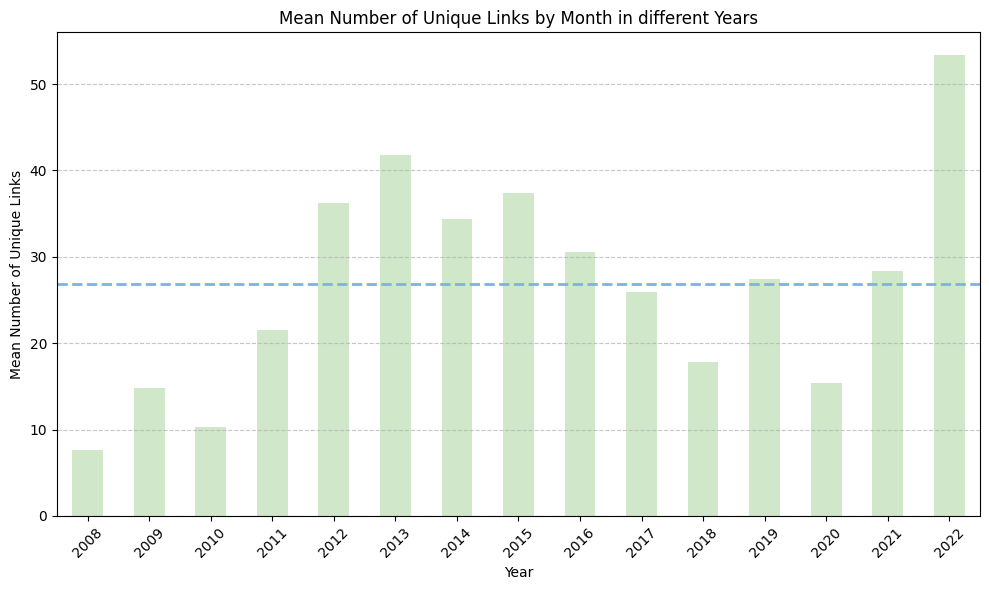

In [219]:
total_mean_links = mean_links_by_year.mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
mean_links_by_year.plot(kind='bar', color='#D0E7CA')
plt.axhline(total_mean_links, color='#7EB2E4', linestyle='--', label=f'Total Mean ({total_mean_links:.2f})', linewidth=2)
plt.title('Mean Number of Unique Links by Month in different Years')
plt.xlabel('Year')
plt.ylabel('Mean Number of Unique Links')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [213]:
df.columns

Index(['Title', 'Link', 'Excerpt', 'Author', 'ID', 'Tags', 'Year', 'Month',
       'Day', 'Date', 'library_tags', 'library_excerpt', 'library_title',
       '1lib1ref'],
      dtype='object')

In [210]:
total_mean_links

26.86111111111111

In [169]:
from bokeh.palettes import Iridescent

['#7EB2E4',
 '#7BBCE7',
 '#81C4E7',
 '#8DCBE4',
 '#9BD2E1',
 '#A8D8DC',
 '#B5DDD8',
 '#C2E3D2',
 '#D0E7CA',
 '#DDECBF',
 '#EAF0B5',
 '#F5F3C1',
 '#FCF7D5',
 '#FEFBE9']

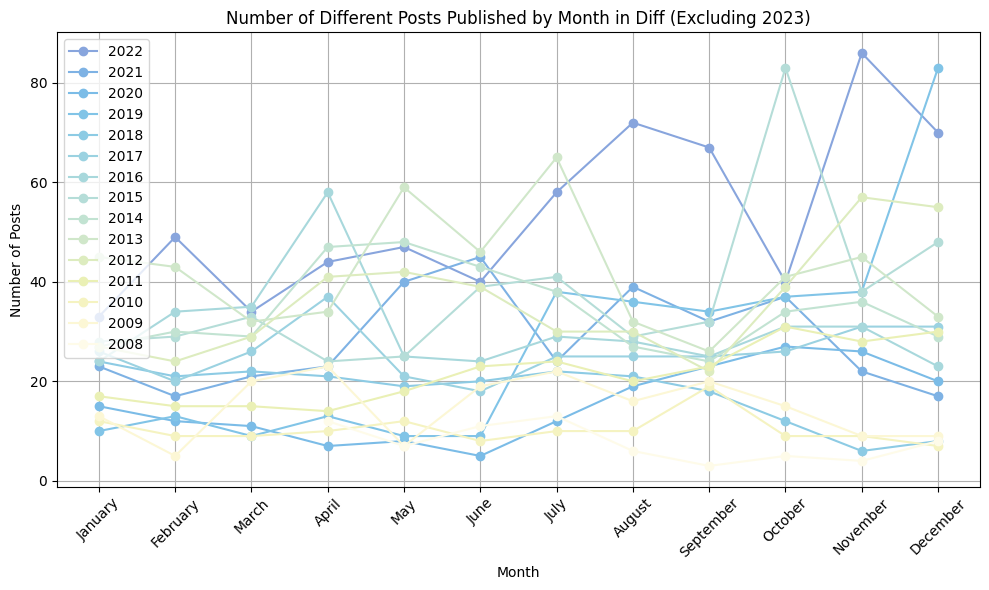

In [171]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure that 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Exclude the year 2023 from the data
df_filtered = df[df['Year'] != 2023]

# Group the filtered data by year and month and count unique Links
monthly_data = df_filtered.groupby(['Year', 'Month'])['Link'].nunique()

# Get unique years in the filtered data
unique_years = df_filtered['Year'].unique()

# Define a list of line colors
line_colors = list(Iridescent[15][::-1])

# Create a single graph with different line colors for each year
plt.figure(figsize=(10, 6))
for i, year in enumerate(unique_years):
    # Filter the data for the current year
    data_year = monthly_data[year]
    
    # Plot the data for the current year with a unique line color
    plt.plot(data_year.index, data_year.values, marker='o', label=f'{year}', color=line_colors[i % len(line_colors)])

plt.title('Number of Different Posts Published by Month in Diff (Excluding 2023)')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.grid(True)

# Set the x-axis ticks to be all months (January to December)
all_months = range(1, 13)
plt.xticks(all_months, [month_names[month - 1] for month in all_months], rotation=45)

# Add a legend to differentiate years
plt.legend(loc='best')

plt.tight_layout()

# Show the single graph with different line colors
plt.show()


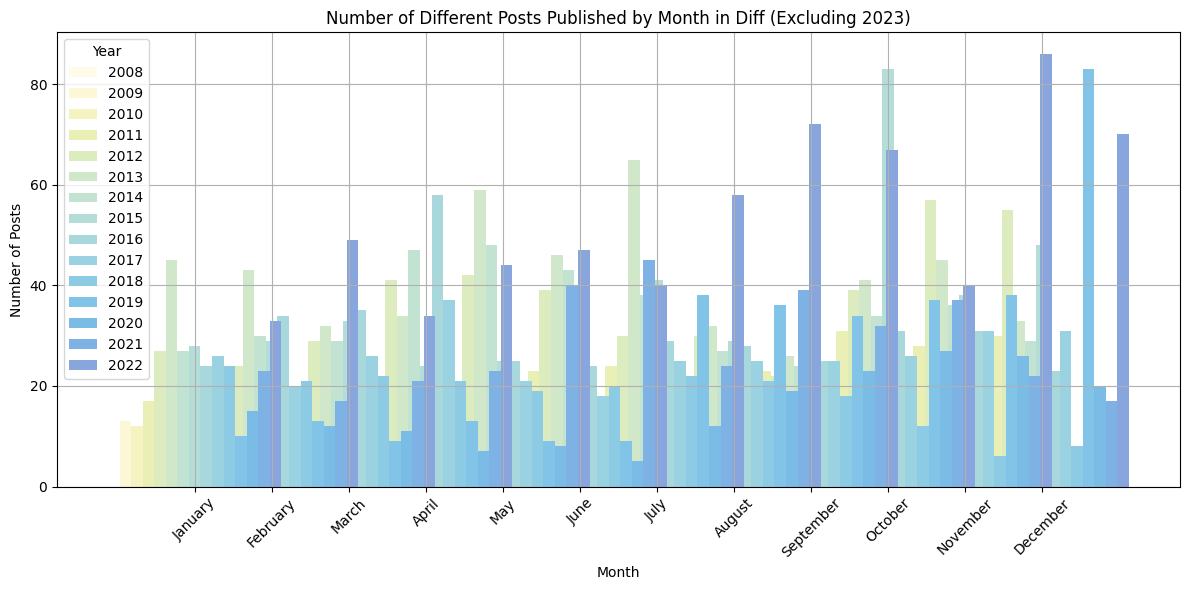

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure that 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and month from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Exclude the year 2023 from the data
df_filtered = df[df['Year'] != 2023]

# Group the filtered data by year and month and count unique Links
monthly_data = df_filtered.groupby(['Year', 'Month'])['Link'].nunique()

# Get unique years in the filtered data
unique_years = df_filtered['Year'].unique()

# Define a list of colors for bars
bar_colors = list(Iridescent[15])

# Create numerical values for the x-axis
x_values = np.arange(1, 13)

# Adjust the bar width and position for multiple bars
bar_width = 0.15
num_years = len(unique_years)

# Create a single bar plot with bars for each year
plt.figure(figsize=(12, 6))

for i, year in enumerate(sorted(unique_years)):
    # Filter the data for the current year
    data_year = monthly_data[year]
    
    # Create an offset for each year
    offset = (i - (num_years - 1) / 2) * bar_width
    
    # Create a bar for the current year with a unique color
    # Fill in missing months with zero values
    data_year_filled = data_year.reindex(range(1, 13), fill_value=0)
    plt.bar(x_values + offset, data_year_filled.values, width=bar_width, label=f'{year}', color=bar_colors[i % len(bar_colors)])

plt.title('Number of Different Posts Published by Month in Diff (Excluding 2023)')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.xticks(x_values, [month_names[month - 1] for month in x_values], rotation=45)

# Add a legend to differentiate years
plt.legend(loc='best', title='Year')

plt.tight_layout()
plt.show()


In [184]:
# Create the 'library_tags' column based on the 'Tags' column
df['library_tags'] = df['Tags'].str.contains(r'\bbibl*|\blibr*', case=False, regex=True).fillna(False).astype(int)

In [188]:
df['library_excerpt'] = df['Excerpt'].str.contains(r'\bbibl*|\blibr*', case=False, regex=True).fillna(False).astype(int)

In [196]:
df['library_title'] = df['Title'].str.contains(r'\bbibl*|\blibr*', case=False, regex=True).fillna(False).astype(int)

In [201]:
df['1lib1ref'] = df['Tags'].str.contains(r'1lib1ref', case=False, regex=True).fillna(False).astype(int)

In [202]:
libraries = df[(df['library_excerpt'] == 1) | (df['library_tags'] == 1) | (df['library_title'] == 1)|(df['1lib1ref'] == 1)]

In [220]:
libraries.head()

Title  \
11  The British Library Loves Manuscripts on Wikis...   
16  Día Mundial de la Libertad de Prensa UNESCO 20...   
65  データベースとWikimediaのさらなる連携に向けて #2：Web OYA-bunkoの活用事例   
82  La Biblioteca nazionale svizzera crea una coll...   
83  La Bibliothèque nationale suisse crée une coll...   

                                                 Link  \
11  https://diff.wikimedia.org/2023/08/28/the-brit...   
16  https://diff.wikimedia.org/es/2023/08/23/dia-m...   
65  https://diff.wikimedia.org/ja/2023/08/10/%e3%8...   
82  https://diff.wikimedia.org/it/2023/08/08/la-bi...   
83  https://diff.wikimedia.org/fr/2023/08/08/la-bi...   

                                              Excerpt  Author      ID  \
11  <p>The British Library has joined hands with t...     144  101560   
16  <p>La Conferencia del Día Mundial de la Libert...     708  101508   
65                        <p>Web OYA-bunkoの活用事例</p>\n     794  100324   
82  <p>In collaborazione con Wikimedia CH Svizzera...    1481  100563   
83  <p>Coopération avec Wikimedia&nbsp;CH Suisse –...    1481  100560   

                                                 Tags  Year  Month Day  \
11                          Culture and Heritage|GLAM  2023      8  28   
16                                                NaN  2023      8  23   
65  Japan|Japanese Magazines|Japanese Wikipedia|Oy...  2023      8  10   
82                        multilingual post|Wikipedia  2023      8  08   
83                        multilingual post|Wikipedia  2023      8  08   

         Date  library_tags  library_excerpt  library_title  1lib1ref  
11 2023-08-28             0                1              1         0  
16 2023-08-23             0                1              1         0  
65 2023-08-10             1                0              0         0  
82 2023-08-08             0                0              1         0  
83 2023-08-08             0                0              1         0

In [226]:
len(bar_colors)

15

/tmp/ipykernel_116/1288873186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  libraries['Date'] = pd.to_datetime(libraries['Year'].astype(str) + '-' + libraries['Month'].astype(str) + '-1')


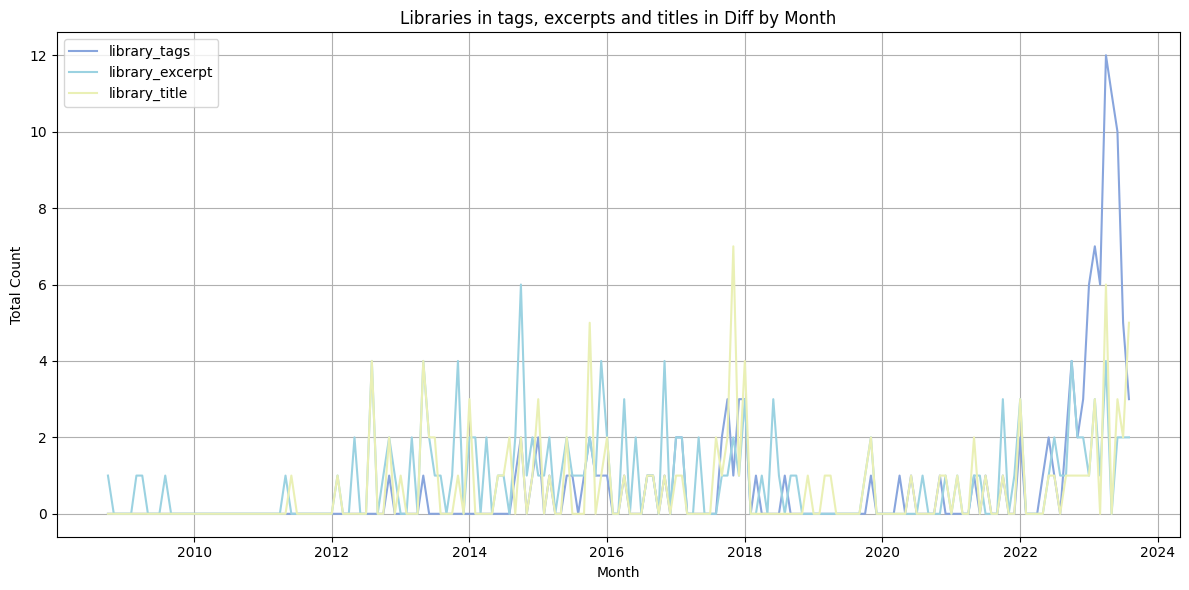

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that 'Year' and 'Month' are in datetime format
libraries['Date'] = pd.to_datetime(libraries['Year'].astype(str) + '-' + libraries['Month'].astype(str) + '-1')

# Group by month and sum the columns
monthly_sum = libraries.groupby(['Date'])[['library_tags', 'library_excerpt', 'library_title']].sum()

# Create a DataFrame with all months from a specified range
start_date = libraries['Date'].min()
end_date = libraries['Date'].max()
date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
all_months = pd.DataFrame(index=date_range)

# Merge the two DataFrames to fill in missing months
monthly_data = all_months.join(monthly_sum).fillna(0)

# Create the data visualization
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['library_tags'], label='library_tags', color = bar_colors[14])
plt.plot(monthly_data.index, monthly_data['library_excerpt'], label='library_excerpt', color = bar_colors[9])
plt.plot(monthly_data.index, monthly_data['library_title'], label='library_title', color = bar_colors[3])

plt.title('Libraries in tags, excerpts and titles in Diff by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [235]:
# Filter for rows where 1 appears in 'library_tags'
earliest_date_tags = libraries[libraries['library_tags'] == 1]['Date'].min()

# Filter for rows where 1 appears in 'library_excerpt'
earliest_date_excerpt = libraries[libraries['library_excerpt'] == 1]['Date'].min()

# Filter for rows where 1 appears in 'library_title'
earliest_date_title = libraries[libraries['library_title'] == 1]['Date'].min()

# Print the earliest dates for each column
print("Earliest Date for library_tags:", earliest_date_tags)
print("Earliest Date for library_excerpt:", earliest_date_excerpt)
print("Earliest Date for library_title:", earliest_date_title)

Earliest Date for library_tags: 2012-11-01 00:00:00
Earliest Date for library_excerpt: 2008-10-01 00:00:00
Earliest Date for library_title: 2011-06-01 00:00:00


In [204]:
correlation_matrix = df[['library_tags', 'library_excerpt', 'library_title', '1lib1ref']].corr()
# Display the correlation matrix
print(correlation_matrix)

                 library_tags  library_excerpt  library_title  1lib1ref
library_tags         1.000000         0.230327       0.351543  0.195490
library_excerpt      0.230327         1.000000       0.453447  0.122935
library_title        0.351543         0.453447       1.000000  0.165960
1lib1ref             0.195490         0.122935       0.165960  1.000000


In [7]:
tags_series = df['Tags'].str.split('|').explode()
tag_counts = tags_series.value_counts()

In [11]:
type(tag_counts)

pandas.core.series.Series

In [29]:
cluster_tags = tag_counts.reset_index()
cluster_tags.columns = ['Tags', 'Count']

In [63]:
cluster_tags['Tags'].head()

0     Wikimedia Blog (EN Archive)
1                            None
2                       Wikipedia
3               multilingual post
4    Wikimedia Space (EN Archive)
Name: Tags, dtype: object

In [66]:
cluster_tags['tags_clean'] = cluster_tags['Tags'].str.lower().str.strip().str.split('|')

In [68]:
cluster_tags['tags_clean'] = cluster_tags['tags_clean'].apply(lambda x: ', '.join(x))

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [70]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(cluster_tags['tags_clean'])
tfidf_matrix

<3918x3452 sparse matrix of type '<class 'numpy.float64'>'
	with 6849 stored elements in Compressed Sparse Row format>

In [71]:
# K-means clustering (you can choose the number of clusters)
num_clusters = 100
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
kmeans.fit(tfidf_matrix)

# Add cluster labels to the DataFrame
cluster_tags['Cluster'] = kmeans.labels_

# Display the clustered tags
print(cluster_tags)

                              Tags  Count  Cluster  \
0      Wikimedia Blog (EN Archive)   3099       91   
1                             None    635        5   
2                        Wikipedia    510       37   
3                multilingual post    290        5   
4     Wikimedia Space (EN Archive)    210       91   
...                            ...    ...      ...   
3913                     Subsídios      1        5   
3914        Consultas Comunitárias      1        5   
3915                     Communism      1        5   
3916  Wiki Loves Música Portuguesa      1       36   
3917                      Stu West      1        5   

                        tags_clean  tags_clean   
0      wikimedia blog (en archive)           41  
1                             none           49  
2                        wikipedia            8  
3                multilingual post           49  
4     wikimedia space (en archive)           41  
...                            ...          ...  
3

In [72]:
# Find all tags containing 'libr*' or 'bibli*'
filtered_tags = cluster_tags[cluster_tags['tags_clean'].str.contains(r'(libr|bibli)\w*', case=False, regex=True)]

# Get the cluster numbers for the filtered tags
cluster_numbers = filtered_tags['Cluster'].unique()

# Display all elements in the clusters of the filtered tags
for cluster_number in cluster_numbers:
    cluster_elements = cluster_tags[cluster_tags['Cluster'] == cluster_number]
    print(f"Cluster {cluster_number}:")
    print(cluster_elements)

Cluster 5:
                        Tags  Count  Cluster              tags_clean  \
1                       None    635        5                    none   
3          multilingual post    290        5       multilingual post   
11                     Japan    120        5                   japan   
14                  Research     85        5                research   
19                Gender gap     61        5              gender gap   
...                      ...    ...      ...                     ...   
3912                 Animals      1        5                 animals   
3913               Subsídios      1        5               subsídios   
3914  Consultas Comunitárias      1        5  consultas comunitárias   
3915               Communism      1        5               communism   
3917                Stu West      1        5                stu west   

      tags_clean   
1              49  
3              49  
11             47  
14             17  
19             49  
... 

/tmp/ipykernel_116/3201542489.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_tags = cluster_tags[cluster_tags['tags_clean'].str.contains(r'(libr|bibli)\w*', case=False, regex=True)]


In [49]:
cluster_93 = cluster_tags[cluster_tags['Cluster'] == 93]

In [50]:
cluster_93

Tags  Count  Cluster  \
44                          Library     38       93   
98               Oya Soichi Library     22       93   
177           The Wikipedia Library     12       93   
232               Wikipedia Library     10       93   
361                   Sanko Library      7       93   
935    Kanagawa Prefectural Library      3       93   
1479                british library      2       93   
2377         Swiss National Library      1       93   
2634               Wellcome Library      1       93   
2736      National Library of Wales      1       93   
2780                   page library      1       93   
3458  biodiversity heritage library      1       93   
3652            Library of Virginia      1       93   
3816              wikipedia library      1       93   

                           tags_clean  
44                          [library]  
98               [oya soichi library]  
177           [the wikipedia library]  
232               [wikipedia library]  
361                   [sanko library]  
935    [kanagawa prefectural library]  
1479                [british library]  
2377         [swiss national library]  
2634               [wellcome library]  
2736      [national library of wales]  
2780                   [page library]  
3458  [biodiversity heritage library]  
3652            [library of virginia]  
3816              [wikipedia library]